In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.decomposition import PCA

In [6]:
col_Names=["id","ratioTab","ratioSpace","ratioEmptyLines","ratioSeparator","numSeparatorLeadLines","avgLineLength","numLinesWithVals","numLineWithVars","NumLinesWithEquals","numOpenBrackets","numCloseBrackets","numOpenEqualsNumCloseBrackets","maxDepthPSI","maxNumberOfPSIChildren","numPSINodes","numPSISpaces","maxNumRatioPSISpaces","avgNumRatioPSISpaces","numPSIElements","numPSIWhiteSpaces","avgNumPSIElements","avgNumPSIWhitespaces","numPSILines","avgPSILineLength"]

df=pd.read_csv('features.tsv', sep='\t', names=col_Names)

print(df)

print(df.info())

print(df.describe())



            id  ratioTab  ratioSpace  ratioEmptyLines  ratioSeparator  \
0            1       0.0   -2.031432              0.0       -1.406914   
1            2       0.0   -1.205042              0.0       -0.643077   
2            3       0.0   -1.562313              0.0       -1.100832   
3            4       0.0   -1.625186              0.0       -1.183770   
4            5       0.0   -2.014903              0.0       -1.386294   
5            6       0.0   -1.704748              0.0       -0.980829   
6            7       0.0   -2.072473              0.0       -1.457753   
7            8       0.0   -1.172224              0.0       -0.597837   
8            9       0.0   -0.969401              0.0       -0.286425   
9           10       0.0   -1.390830              0.0       -0.832260   
10          11       0.0   -1.157181              0.0       -0.591515   
11          12       0.0   -1.422104              0.0       -0.962480   
12          13       0.0   -0.913509              0

                  id       ratioTab     ratioSpace  ratioEmptyLines  \
count  123516.000000  123516.000000  123516.000000         123516.0   
mean    61758.500000      -0.121217      -1.737732              0.0   
std     35656.142262       0.629986       0.480664              0.0   
min         1.000000      -8.018735      -5.240991              0.0   
25%     30879.750000       0.000000      -2.014903              0.0   
50%     61758.500000       0.000000      -1.694891              0.0   
75%     92637.250000       0.000000      -1.402604              0.0   
max    123516.000000       0.000000       0.000000              0.0   

       ratioSeparator  numSeparatorLeadLines  avgLineLength  numLinesWithVals  \
count   123516.000000          123516.000000  123516.000000     123516.000000   
mean        -1.158161               0.496017      22.413974          0.767123   
std          0.504136               0.499986      11.431077          1.976823   
min         -4.793292               

In [7]:
params = np.array(df.values[:,1:], dtype="float64")
params = scale(params)

In [8]:
X = PCA(n_components=2).fit_transform(params)
num = X.shape[0]
OUTLIER_FRACTION = 0.0001

In [9]:
clf = svm.OneClassSVM(kernel="rbf")
clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [10]:
dist_to_border = clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_inlier = dist_to_border > threshold

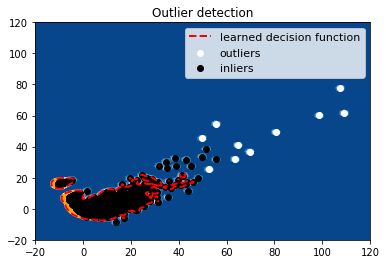

In [14]:
xx, yy = np.meshgrid(np.linspace(-20, 120, 500), np.linspace(-20, 120, 500))
n_inliers = int((1. - OUTLIER_FRACTION) * num)
n_outliers = int(OUTLIER_FRACTION * num)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(X[is_inlier == 0, 0], X[is_inlier == 0, 1], c='white')
c = plt.scatter(X[is_inlier == 1, 0], X[is_inlier == 1, 1], c='black')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((-20, 120))
plt.ylim((-20, 120))
plt.show()

In [15]:
print(df[is_inlier == 0])

            id  ratioTab  ratioSpace  ratioEmptyLines  ratioSeparator  \
19412    19413       0.0   -1.728056              0.0       -1.341941   
25391    25392       0.0   -0.757405              0.0       -0.026446   
25400    25401       0.0   -1.028009              0.0       -0.420215   
38417    38418       0.0   -1.674357              0.0       -1.185792   
46369    46370       0.0   -1.063876              0.0       -0.495009   
54459    54460       0.0   -1.120710              0.0       -0.541653   
70611    70612       0.0   -1.830093              0.0       -1.436976   
71096    71097       0.0   -2.076045              0.0       -1.772183   
71309    71310       0.0   -1.926998              0.0       -1.512438   
105371  105372       0.0   -1.369384              0.0       -0.850707   
116154  116155       0.0   -2.039463              0.0       -1.465602   
116161  116162       0.0   -1.759738              0.0       -1.231803   
119904  119905       0.0   -0.951381              0